# CiFAR-10 Images Classification using Convolutional Neural Networks

## The dataset contains 60000 32*32 color images. The dataset is balanced with 6000 images for each class.

## Problem Statement : 
### Build a convolutional neural network to classify the images in the dataset

## Classes in this dataset are : 
        1. Airplanes
        2. Cars
        3. Birds
        4. Cats
        5. Deer
        6. Dogs
        7. Frogs
        8. Horses
        9. Ships
        10. Trucks

In [23]:
classes = {0:'Airplane',1:'Cars',2:'Birds',3:'Cats',4:'Deer',5:'Dogs',6:'Frogs',7:'Horses',8:'Ships',9:'Trucks'}

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from keras.datasets import cifar10


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

## 2. Visualizations and Data pre-processing

Class :  [9]


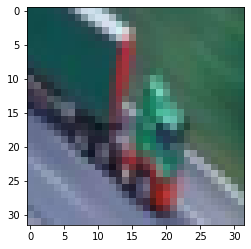

In [14]:
plt.imshow(X_train[50])
print("Class : ", y_train[50])

Class :  [1]


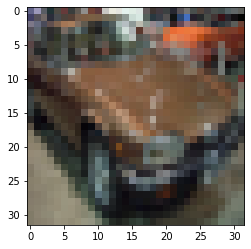

In [17]:
plt.imshow(X_test[2000])
print("Class : ", y_test[2000])

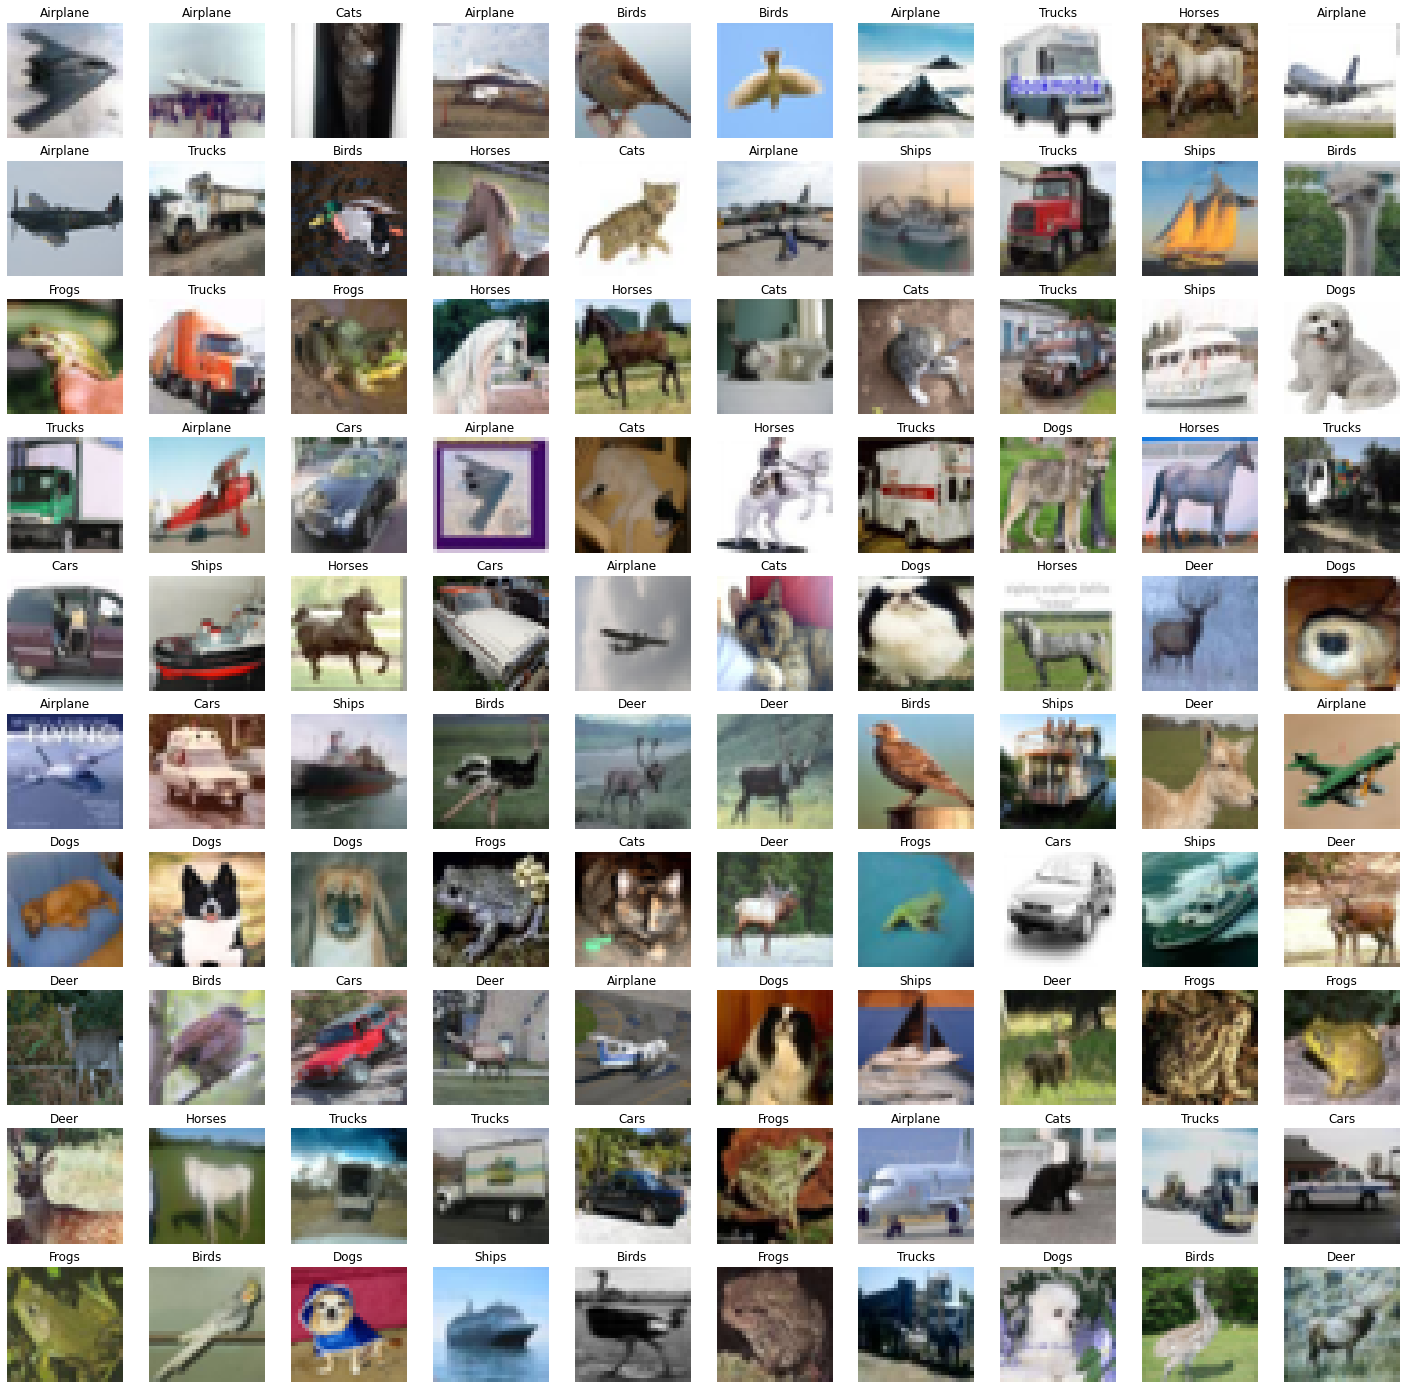

In [33]:
fig, axes = plt.subplots(10,10, figsize = (25,25))
axes = axes.ravel()
for i in np.arange(100):
    # idx is a random interger in range len(X_train)
    idx = np.random.randint(1, len(X_train))
    axes[i].imshow(X_train[idx])
    axes[i].set_title(classes[int((y_train[idx])[0])])
    axes[i].axis('off')  

In [37]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# now i am going to normalize the X_train and X-test by dividing the pixel values by 255
X_train = X_train/255
X_test = X_test/2

In [40]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [41]:
X_test

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [ ]:
# Since we converted the X_train and X_test to decimal values the actual classes become decimal values so we need to convert
# the y_train and Y_test to decimal but these are classes which are categorical so i am going to convert from decimal
# format to binary format Now if i train the convolution i can get the class directly.
# For Exxample lets say if i feed in a deer which is class 4 it should find the first neuron or just the first output firing
# Which means that firing will be the image corresponding to that specific class.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [39]:
y_train

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0.

In [38]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

#### Ok now that the data looks great lets train the model
## 3. Training